In [6]:
import sys, os
import matplotlib.pyplot as plt

sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname("src"))))
from src.LogViewer import LogViewer
from src.utils import SingleModelTrainingProcess
from src.Mydataloader import LoadDataset

In [7]:
ReduceLROnPlateau_patiance = 5
ReduceLROnPlateau_cooldown = 5

# %%
"""Dataset selection"""
DATASET = "CIFAR10"
# DATASET = "CIFAR100"
# DATASET = "ImageNet2012"

"""Dataset parameters"""
BATCH = 128

"""optimizer parameters"""
optim_list = [
    # "Adam",
    # "Adam_decay",
    "SGD",
    # "SGD_nasterov",
    # "AdamW",
    # "AdamW_amsgrad",
    # "NAdam",
]
PRINT_PAD_OPTIM = max([len(i) for i in optim_list])

scheduler_list = [
    # "ExponentialLR",
    # "MultiStepLR",
    "ReduceLROnPlateau",
    # "CosineAnnealingLR",
    # "CosineAnnealingWarmUpRestarts",
    # "CycleLR",
    # "ConstantLR",
]
PRINT_PAD_SCHDULER = max([len(i) for i in scheduler_list])

"""Learning rate scheduler parameters"""
NUM_EPOCHS = 150

"""Early stopping parameters"""
EARLYSTOPPINGPATIENCE = 15

tmp = LoadDataset(root="../../data", seceted_dataset=DATASET)
_, _, _, _ = tmp.Unpack()


train_dataloader, valid_dataloader, test_dataloader = tmp.get_dataloader(
    batch_size=BATCH,
    shuffle=True,
    num_workers=8,
    pin_memory=True,
    pin_memory_device="cuda",
    persistent_workers=True,
)
print("-" * 50)

-----------------------------------------------------------------------
Dataset :  CIFAR10
- Length of Train Set :  50000
- Length of Test Set :  10000
- Count of Classes :  10
-----------------------------------------------------------------------
train.transforms = Compose(
      Compose(
        ToImage()
        ToDtype(scale=True)
  )
      Normalize(mean=[0.49139968, 0.48215827, 0.44653124], std=[1, 1, 1], inplace=True)
      RandomCrop(size=(32, 32), padding=[4, 4, 4, 4], pad_if_needed=False, fill=0, padding_mode=constant)
      RandomHorizontalFlip(p=0.5)
) 128
test.transforms = Compose(
      ToImage()
      ToDtype(scale=True)
) 128
--------------------------------------------------


In [8]:
each_trainings = []
# for optim in optim_list:
#     for scheduler in scheduler_list:
#         each_trainings.append(SingleModelTrainingProcess(optim, scheduler))

In [9]:
# each_trainings.append(
#     SingleModelTrainingProcess(
#         dataset=DATASET,
#         batch_size=BATCH,
#         optimizer_name="NAdam",
#         schduler_name="ReduceLROnPlateau",
#         device="cuda",
#         train_dataloader=train_dataloader,
#         valid_dataloader=valid_dataloader,
#         test_dataloader=test_dataloader,
#         Earlystopping_patiance=-1,
#         ReduceLROnPlateau_patiance=ReduceLROnPlateau_patiance,
#         ReduceLROnPlateau_cooldown=ReduceLROnPlateau_cooldown,
#     )
# )
# print("-" * 50)
# each_trainings.append(
#     SingleModelTrainingProcess(
#         dataset=DATASET,
#         batch_size=BATCH,
#         optimizer_name="NAdam",
#         schduler_name="MultiStepLR",
#         device="cuda",
#         train_dataloader=train_dataloader,
#         valid_dataloader=valid_dataloader,
#         test_dataloader=test_dataloader,
#         Earlystopping_patiance=15,
#     )
# )
each_trainings.append(
    SingleModelTrainingProcess(
        dataset=DATASET,
        batch_size=128,
        optimizer_name="SGD",
        schduler_name="MultiStepLR",
        device="cuda",
        train_dataloader=train_dataloader,
        valid_dataloader=valid_dataloader,
        test_dataloader=test_dataloader,
        Earlystopping_patiance=999,
    )
)
print("-" * 50)

Suceessfully loaded the All setting and Log file.
MyResNet32_128_SGD_MultiStepLR
Current epoch is 170
Current learning rate: 0.0010000000000000002
Current best valid loss: 0.0
Current best model loss: 0.0009565809622521291
--------------------------------------------------


1 epoch: train_loss=2.3760, train_acc=0.1281, test_loss=2.0872, test_acc=0.2151, lr=0.1000
2 epoch: train_loss=1.6318, train_acc=0.3814, test_loss=1.7507, test_acc=0.4030, lr=0.1000
3 epoch: train_loss=1.1134, train_acc=0.5972, test_loss=1.1715, test_acc=0.5849, lr=0.1000
4 epoch: train_loss=0.8430, train_acc=0.7043, test_loss=0.7878, test_acc=0.7261, lr=0.1000
5 epoch: train_loss=0.6783, train_acc=0.7629, test_loss=0.7883, test_acc=0.7289, lr=0.1000
6 epoch: train_loss=0.5760, train_acc=0.7991, test_loss=0.7993, test_acc=0.7246, lr=0.1000
7 epoch: train_loss=0.4994, train_acc=0.8257, test_loss=0.7950, test_acc=0.7309, lr=0.1000
8 epoch: train_loss=0.4413, train_acc=0.8478, test_loss=0.6367, test_acc=0.7870, lr=0.1000
9 epoch: train_loss=0.3917, train_acc=0.8627, test_loss=0.7243, test_acc=0.7697, lr=0.1000
10 epoch: train_loss=0.3549, train_acc=0.8756, test_loss=0.7393, test_acc=0.7654, lr=0.1000
11 epoch: train_loss=0.3153, train_acc=0.8883, test_loss=0.6865, test_acc=0.7848, lr=0.10

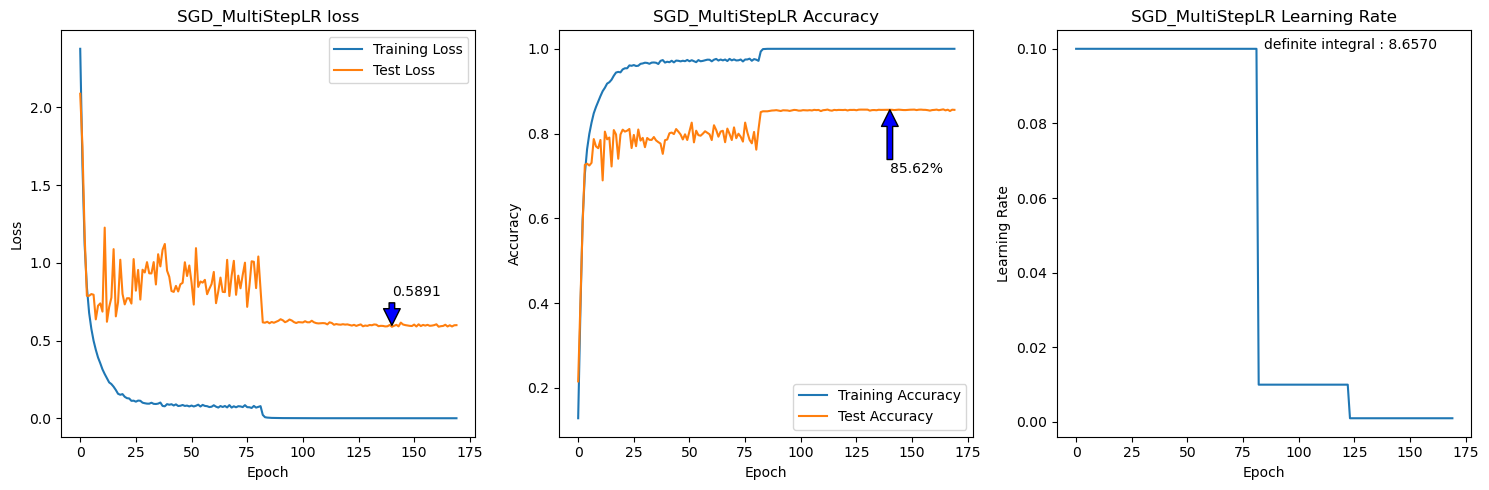

SGD_MultiStepLR
now_lr:  0.0010000000000000002


In [10]:
for training in each_trainings:
    viewer = LogViewer(training.logs)
    viewer.print_all()
    viewer.draw(
        title=training.optimizer_name + "_" + training.scheduler_name,
        min_marker=True,
        save=True,
        add_lr_plot=True,
    )
    print(training.optimizer_name + "_" + training.scheduler_name)
    if training.scheduler_name == "ReduceLROnPlateau":
        print(training.scheduler.num_bad_epochs)
        print(training.scheduler.cooldown_counter)
        print(training.scheduler.patience)

    print("now_lr: ", training.optimizer.param_groups[0]["lr"])

In [11]:
# for training in each_trainings:
#     # training.logs["train_loss"] = training.logs["train_loss"][:108]
#     # training.logs["train_acc"] = training.logs["train_acc"][:108]
#     # training.logs["valid_loss"] = training.logs["valid_loss"][:108]
#     # training.logs["valid_acc"] = training.logs["valid_acc"][:108]
#     # training.logs["test_loss"] = training.logs["test_loss"][:108]
#     # training.logs["test_acc"] = training.logs["test_acc"][:108]
#     # training.logs["lr_log"] = training.logs["lr_log"][:108]
#     training.save_model()

In [12]:
# import numpy as np
# print(np.min(each_trainings[0].logs["valid_loss"]))
# print(np.min(each_trainings[1].logs["valid_loss"]))

In [13]:
# each_trainings[0].earlystopper.best_eval_loss = 3.1306022539430733
# each_trainings[1].earlystopper.best_eval_loss = 1.3550978181313496

In [14]:
# # each_trainings[0].save_model()
# # each_trainings[1].save_model()
# import torch
# torch.save(each_trainings[0].model.state_dict(), each_trainings[0].file_name + ".pth")
# torch.save(each_trainings[1].model.state_dict(), each_trainings[1].file_name + ".pth")